In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [7]:
df['smoker'].unique()

array(['no', 'yes'], dtype=object)

In [8]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [9]:
#numerical column repalce it with mean 
# for categorical use mode as fill
for i in df.columns:
    if df[i].dtype == 'object':
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace=True)

C:\Users\islov\AppData\Local\Temp\ipykernel_4824\400817789.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(),inplace=True)
C:\Users\islov\AppData\Local\Temp\ipykernel_4824\400817789.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [10]:
col_list = []
for i in df.columns:
    if df[i].dtype != 'object':
        if i != 'charges':
            col_list.append(i)

col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [13]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
corr_matrix

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.112161,0.041448,0.122828,0.168311,0.512985,0.136710,0.359391,0.163540,0.293604
bmi,0.112161,1.000000,0.007923,0.093313,0.130667,0.135903,0.256858,0.137060,0.241502,0.198691
children,0.041448,0.007923,1.000000,0.041276,0.054688,0.163307,0.025128,0.185505,0.039983,0.070686
Claim_Amount,0.122828,0.093313,0.041276,1.000000,0.271482,0.398342,0.370310,0.379731,0.403925,0.435635
past_consultations,0.168311,0.130667,0.054688,0.271482,1.000000,0.559682,0.542098,0.500268,0.590880,0.627592
num_of_steps,0.512985,0.135903,0.163307,0.398342,0.559682,1.000000,0.624543,0.845125,0.734412,0.889848
Hospital_expenditure,0.136710,0.256858,0.025128,0.370310,0.542098,0.624543,1.000000,0.652102,0.959483,0.871927
NUmber_of_past_hospitalizations,0.359391,0.137060,0.185505,0.379731,0.500268,0.845125,0.652102,1.000000,0.736124,0.820844
Anual_Salary,0.163540,0.241502,0.039983,0.403925,0.590880,0.734412,0.959483,0.736124,1.000000,0.948105
charges,0.293604,0.198691,0.070686,0.435635,0.627592,0.889848,0.871927,0.820844,0.948105,1.000000


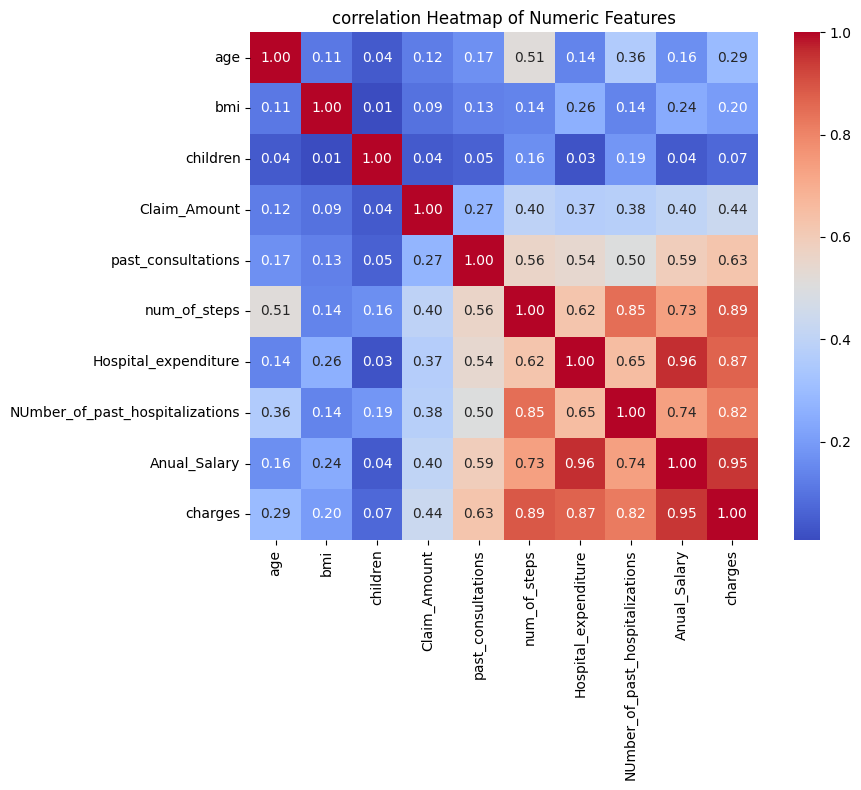

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True, fmt=".2f",cmap="coolwarm",square=True)
plt.title("correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

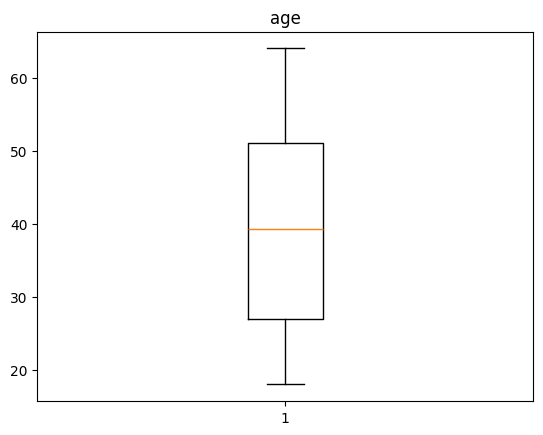

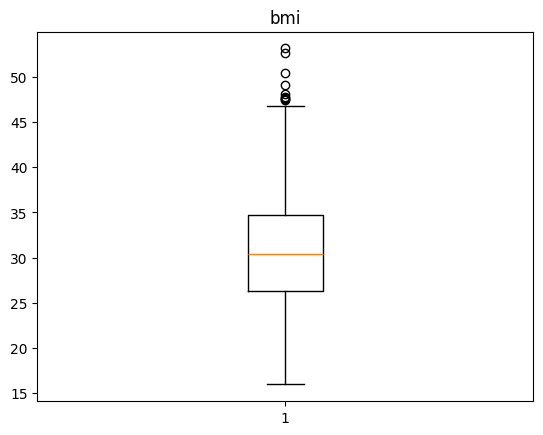

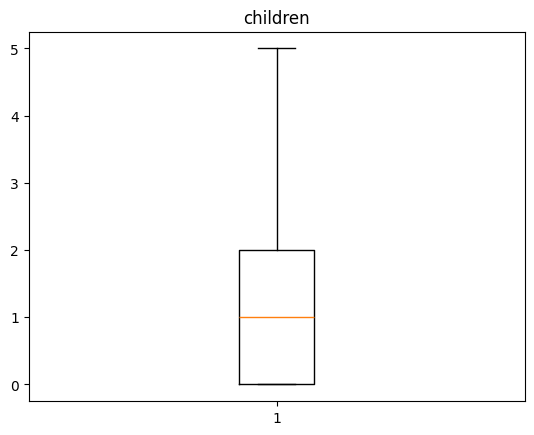

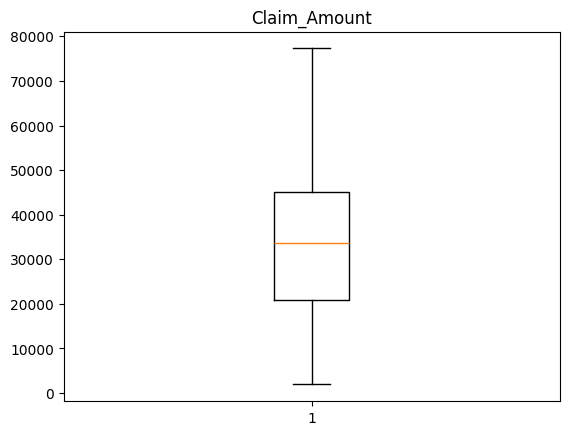

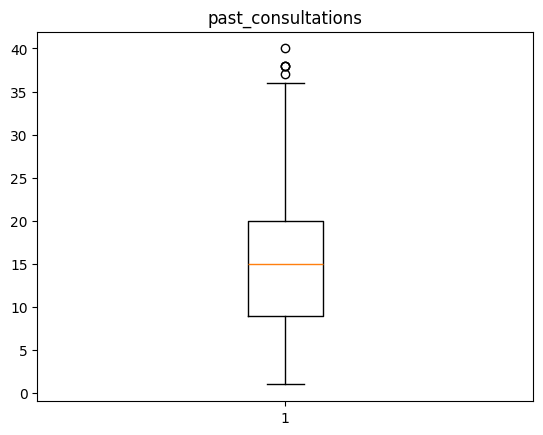

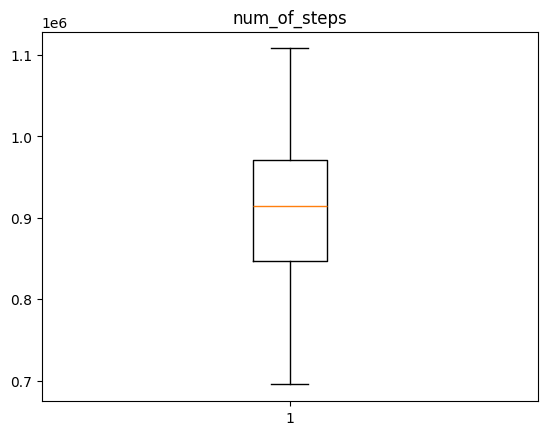

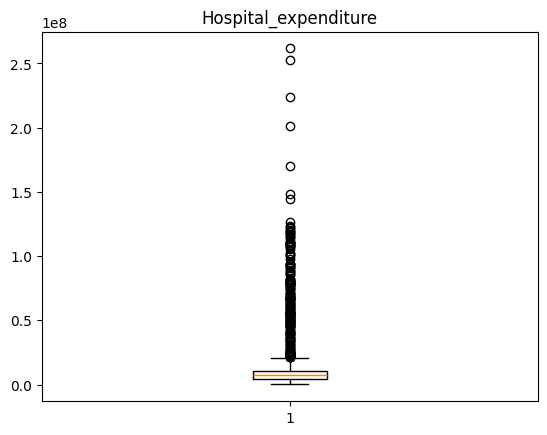

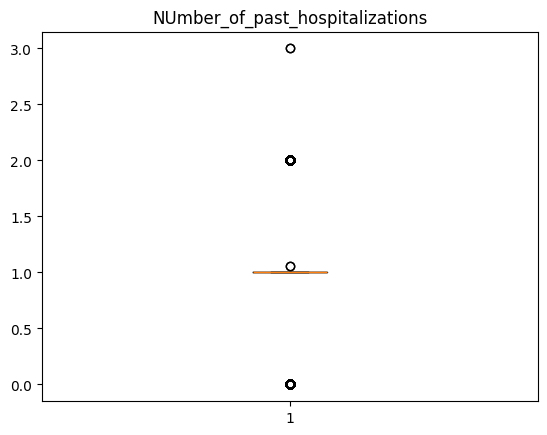

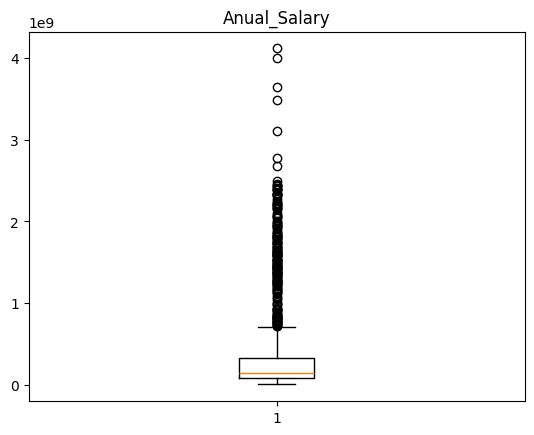

In [19]:
for i in col_list:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [20]:
for i in col_list:
    q3 = df[i].quantile(0.75)
    q1 = df[i].quantile(0.25)
    iqr = q3 - q1
    LB = q1 - 1.5*iqr
    UB = q3 + 1.5* iqr
    df = df[(df[i] >= LB) & (df[i] <= UB)]

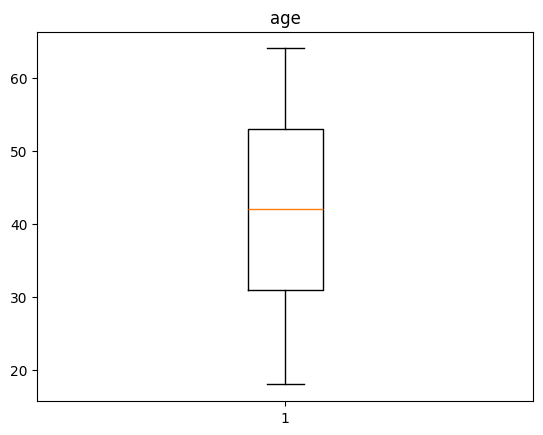

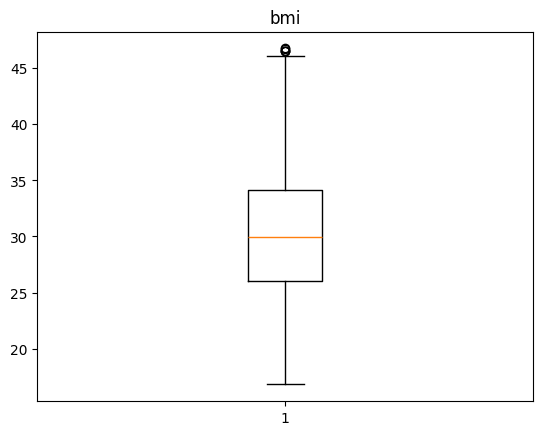

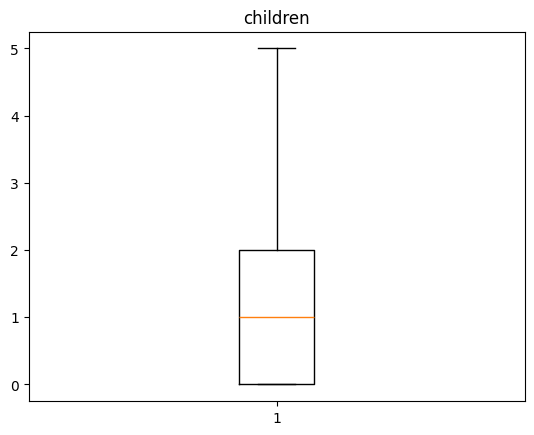

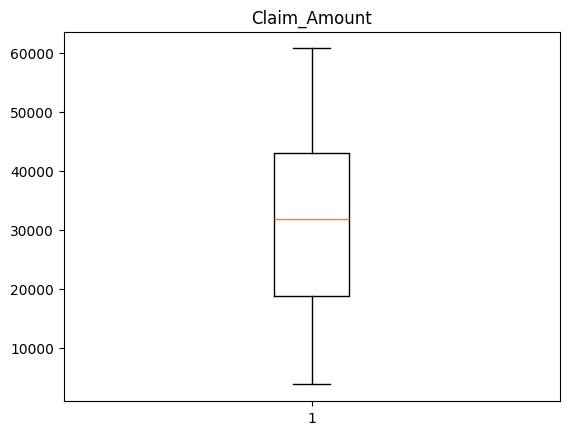

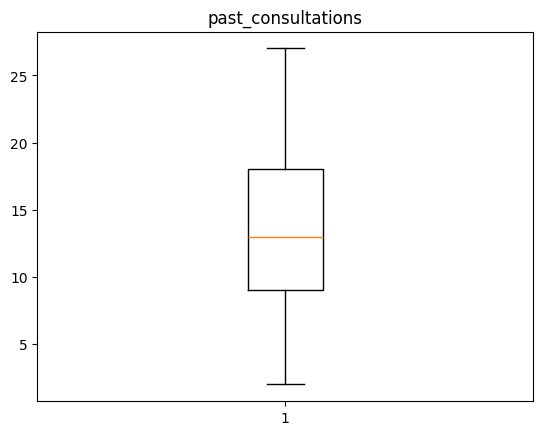

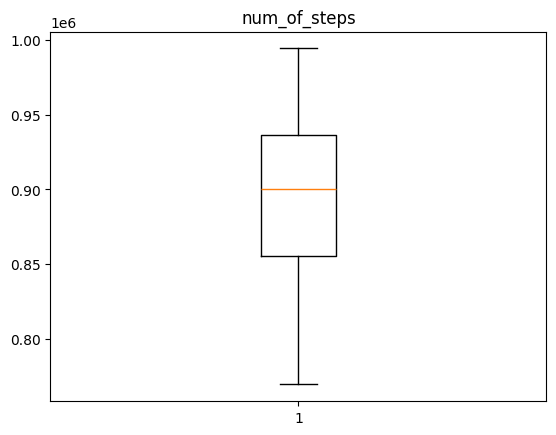

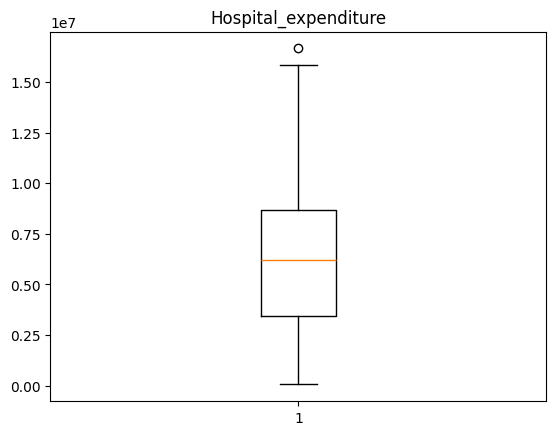

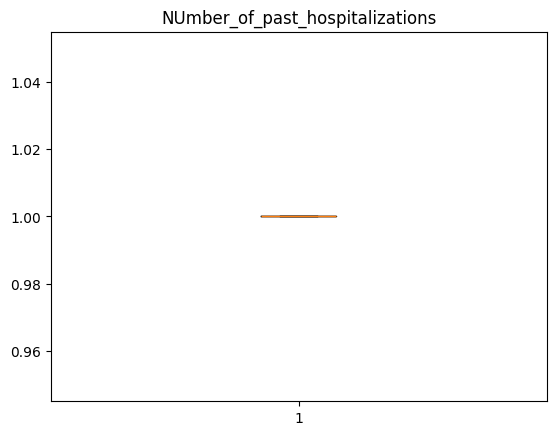

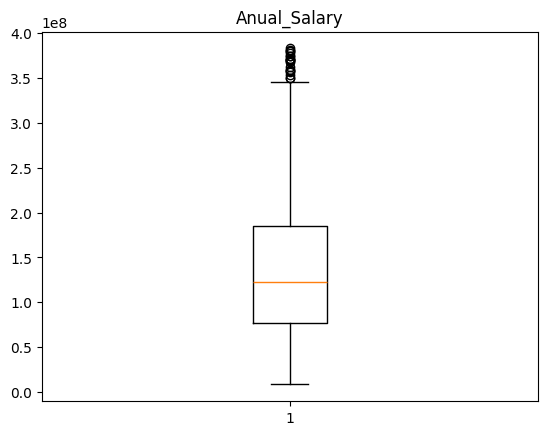

In [21]:
for i in col_list:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [23]:
#Feature Selection
#VIF : variance inflation factor
#vif helps us to detect the multicolinearity among the columns. 
# If your vif > = 6 it means that column is not important for us, as it having high multicolinearity.
#We will remove those values from dataset.
#how do we find VIF?

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
dummy = df[col_list]
dummy

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
151,25.0,27.550,0.0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07
152,22.0,20.235,0.0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07
153,25.0,35.625,0.0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07
154,20.0,31.130,2.0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07
155,21.0,17.400,1.0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07
...,...,...,...,...,...,...,...,...,...
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1048,31.0,25.900,3.0,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08
1050,31.0,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08


In [26]:
pd.DataFrame(dummy)

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
151,25.0,27.550,0.0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07
152,22.0,20.235,0.0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07
153,25.0,35.625,0.0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07
154,20.0,31.130,2.0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07
155,21.0,17.400,1.0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07
...,...,...,...,...,...,...,...,...,...
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1048,31.0,25.900,3.0,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08
1050,31.0,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08


In [27]:
vif_data = pd.DataFrame()
vif_data['Feature'] = dummy.columns #in this feature column we are having all the independent numerical columns of our actual dataframe
vif_data

,Feature
0,age
1,bmi
2,children
3,Claim_Amount
4,past_consultations
5,num_of_steps
6,Hospital_expenditure
7,NUmber_of_past_hospitalizations
8,Anual_Salary


In [28]:
vif_list = []
for i in range(len(dummy.columns)):
    vif = variance_inflation_factor(dummy.values,i)
    vif_list.append(vif)

vif_data['VIF'] = vif_list
vif_data

,Feature,VIF
0,age,2.196194
1,bmi,1.052717
2,children,1.076523
3,Claim_Amount,1.035033
4,past_consultations,1.073989
5,num_of_steps,5.882074
6,Hospital_expenditure,1.173208
7,NUmber_of_past_hospitalizations,1393.169724
8,Anual_Salary,3.983678


In [30]:
df.drop(columns='NUmber_of_past_hospitalizations', axis = 1, inplace= True)
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary,region,charges
151,25.0,male,27.550,0.0,no,39148.95495,10.0,780652.0,8.614147e+06,54526009.33,northwest,2523.16950
152,22.0,female,20.235,0.0,no,41547.52536,13.0,802627.0,2.491594e+05,16718473.13,northwest,2527.81865
153,25.0,male,35.625,0.0,no,39660.60193,12.0,770773.0,3.043323e+06,48526941.68,northwest,2534.39375
154,20.0,male,31.130,2.0,no,16032.87148,7.0,769255.0,1.599069e+06,24412621.85,southeast,2566.47070
155,21.0,female,17.400,1.0,no,31090.98977,21.0,778769.0,3.015365e+06,58535788.80,southwest,2585.26900


In [32]:
col_list = []
for i in df.columns:
    if df[i].dtype != 'object':
        if i != 'charges':
            col_list.append(i)

dummy= df[col_list]

vif_data = pd.DataFrame()
vif_data['Feature'] = dummy.columns #in this feature column we are having all the independent numerical columns of our actual dataframe
vif_data

vif_list = []
for i in range(len(dummy.columns)):
    vif = variance_inflation_factor(dummy.values,i)
    vif_list.append(vif)

vif_data['VIF'] = vif_list
vif_data

,Feature,VIF
0,age,16.357708
1,bmi,26.868143
2,children,2.069345
3,Claim_Amount,5.864753
4,past_consultations,6.463488
5,num_of_steps,58.376344
6,Hospital_expenditure,5.423018
7,Anual_Salary,6.000703


In [33]:
df.drop(columns=['age','bmi','num_of_steps'], inplace = True, axis = 1)
df.head()

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
151,male,0.0,no,39148.95495,10.0,8.614147e+06,54526009.33,northwest,2523.16950
152,female,0.0,no,41547.52536,13.0,2.491594e+05,16718473.13,northwest,2527.81865
153,male,0.0,no,39660.60193,12.0,3.043323e+06,48526941.68,northwest,2534.39375
154,male,2.0,no,16032.87148,7.0,1.599069e+06,24412621.85,southeast,2566.47070
155,female,1.0,no,31090.98977,21.0,3.015365e+06,58535788.80,southwest,2585.26900


In [34]:
col_list = []
for i in df.columns:
    if df[i].dtype != 'object':
        if i != 'charges':
            col_list.append(i)

dummy= df[col_list]

vif_data = pd.DataFrame()
vif_data['Feature'] = dummy.columns #in this feature column we are having all the independent numerical columns of our actual dataframe
vif_data

vif_list = []
for i in range(len(dummy.columns)):
    vif = variance_inflation_factor(dummy.values,i)
    vif_list.append(vif)

vif_data['VIF'] = vif_list
vif_data

,Feature,VIF
0,children,1.827298
1,Claim_Amount,4.290828
2,past_consultations,4.942338
3,Hospital_expenditure,4.624025
4,Anual_Salary,4.922027
